"Main aim of this analysis to establish database connection using mysql.connector and performing some data mining along with EDA".

This notebook demonstrates how to perform MySQL database connectivity in Python and perform data exploration by writing sql queries. This notebook also shown some graph which can be acquired using seaborn and matplotlib pyhton libraires. 

In [1]:
import pandas as pd
# import library to establish connection with SQL database
import mysql.connector
con=mysql.connector.connect(host="localhost",
                           port=3306,
                           user="root",
                           password="@@@@@@",
                           database="database_name")

In [2]:
def Q(sql):
    res=pd.read_sql_query(sql,con)
    return (res)

In [3]:
st=Q("select * from titanic")
st.head(5)

,Passenger,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7,,S\r
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71,C85,C\r
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,8,,S\r
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53,C123,S\r
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8,,S\r


In [4]:
st=Q("select  distinct(Sex) from titanic")
st

,Sex
0,male
1,female


In [5]:
st=Q("select max(Fare) from titanic")
st

,max(Fare)
0,512


In [6]:
st=Q("select min(Fare) from titanic")
st

,min(Fare)
0,0


In [7]:
st=Q("select avg(Fare) from titanic")
st

,avg(Fare)
0,32.2637


In [8]:
st=Q("select  distinct(Embarked) from titanic")
st

,Embarked
0,S\r
1,C\r
2,Q\r
3,\r


In [9]:
st=Q("select  distinct(Parch) from titanic")
st

,Parch
0,0
1,1
2,2
3,5
4,3
5,4
6,6


In [10]:
st=Q("select avg(Age) from titanic")
st

,avg(Age)
0,23.8103


In [11]:
st=Q("select max(Age) from titanic")
st

,max(Age)
0,80


In [12]:
st=Q("select min(Age) from titanic")
st

,min(Age)
0,0


In [13]:
st=Q("select  distinct(Pclass) from titanic")
st

,Pclass
0,3
1,1
2,2


In [14]:
st=Q("select Age from titanic where Age BETWEEN 50 AND 80 GROUP BY  Pclass")
st

,Age
0,54
1,55
2,59


In [15]:
st=Q("select count(Sibsp) from titanic GROUP BY Embarked HAVING COUNT(Sibsp)>1 ORDER BY count(Sibsp) DESC")
st

,count(Sibsp)
0,644
1,168
2,77
3,2


In [16]:
st=Q("select Sex from titanic WHERE Survived = 1")
st.head(5)

,Sex
0,female
1,female
2,female
3,female
4,female


In [17]:
st=Q("select Fare from titanic WHERE Pclass = 3")
st.head()

,Fare
0,7
1,8
2,8
3,8
4,21


In [18]:
st=Q("select Sibsp from titanic WHERE Sibsp >=2")
st.head()

,Sibsp
0,3
1,4
2,3
3,3
4,2


In [19]:
st=Q("select Survived from titanic where Sex = 'female' ")
st.head(7)

,Survived
0,1
1,1
2,1
3,1
4,1
5,1
6,1


In [20]:
st=Q("select * from titanic WHERE Sex = 'female' AND (Survived=0 AND Age BETWEEN 20 AND 50)")
st.head(5)

,Passenger,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31,1,0,345763,18,,S\r
1,41,0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40,1,0,7546,9,,S\r
2,42,0,2,"Turpin, Mrs. William John Robert (Dorothy Ann ...",female,27,1,0,11668,21,,S\r
3,101,0,3,"Petranec, Miss. Matilda",female,28,0,0,349245,8,,S\r
4,114,0,3,"Jussila, Miss. Katriina",female,20,1,0,4136,10,,S\r


In [21]:
st=Q("select Pclass from titanic WHERE Sex = 'male' AND (Survived=1 AND Age <=40)")
st.head(5)

,Pclass
0,2
1,2
2,1
3,3
4,1


In [22]:
st=Q("select Fare from titanic WHERE Fare IS NOT NULL")
st.head(7)

,Fare
0,7
1,71
2,8
3,53
4,8
5,8
6,52


st =Q("Select * from titanic WHERE Parch =5 LIMIT 4")
st

In [23]:
st =Q("Select * from titanic WHERE Embarked = 'S\r' AND Sex = 'male' AND Fare>=25 ")
st.head(3)

,Passenger,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,52,E46,S\r
1,14,0,3,"Andersson, Mr. Anders Johan",male,39,1,5,347082,31,,S\r
2,21,0,2,"Fynney, Mr. Joseph J",male,35,0,0,239865,26,,S\r


In [24]:
st=Q("select * from titanic WHERE Name like 'b%' LIMIT 5")
st

,Passenger,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7,,S\r
1,12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,27,C103,S\r
2,22,1,2,"Beesley, Mr. Lawrence",male,34,0,0,248698,13,D56,S\r
3,75,1,3,"Bing, Mr. Lee",male,32,0,0,1601,56,,S\r
4,86,1,3,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",female,33,3,0,3101278,16,,S\r


In [25]:
st=Q("select Age from titanic WHERE Pclass=3 AND SibSp=3 AND Survived =0 LIMIT 4")
st

,Age
0,2
1,8
2,4
3,0


This way we can write n number of queries for data mining purposes in the pyhton after establishing connection with the database. 

In [26]:
st=Q("select * from titanic")
st

,Passenger,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7,,S\r
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71,C85,C\r
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,8,,S\r
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53,C123,S\r
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8,,S\r
5,6,0,3,"Moran, Mr. James",male,0,0,0,330877,8,,Q\r
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,52,E46,S\r
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21,,S\r
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11,,S\r
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30,,C\r


# Visualize Database using seaborn and matplotlib libraries

In [27]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.countplot(st['Survived'])
plt.title('Survived or Not Survived')

Text(0.5, 1.0, 'Survived or Not Survived')

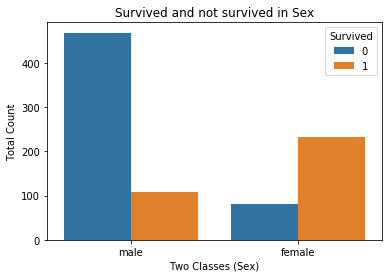

In [28]:
sns.countplot(st['Sex'], hue=st['Survived'])
plt.title('Survived and not survived in Sex')
plt.xlabel('Two Classes (Sex)')
plt.ylabel('Total Count')
plt.show()

# This shows Female has high survival rate then Male

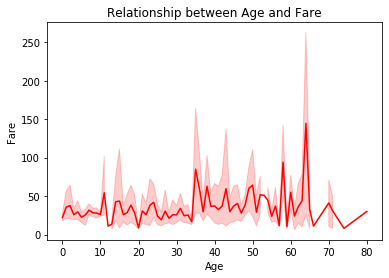

In [29]:
sns.lineplot(x='Age', y= 'Fare', data=st, color='red')
plt.title('Relationship between Age and Fare')
plt.show()

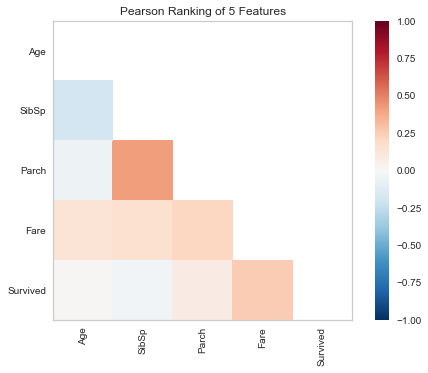

In [30]:
plt.rcParams['figure.figsize'] = (15, 7)
import warnings
warnings.filterwarnings('ignore')
# import the package for visulization of the correlation
num_features = ['Age', 'SibSp', 'Parch', 'Fare', 'Survived']
from yellowbrick.features import Rank2D
X = st[num_features].as_matrix()
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                
visualizer.transform(X)            
visualizer.poof() 

In [31]:
st.isnull().sum()  # Lets see null values

Passenger    0
Survived     0
Pclass       0
Name         0
Sex          0
Age          0
SibSp        0
Parch        0
Ticket       0
Fare         0
Cabin        0
Embarked     0
dtype: int64

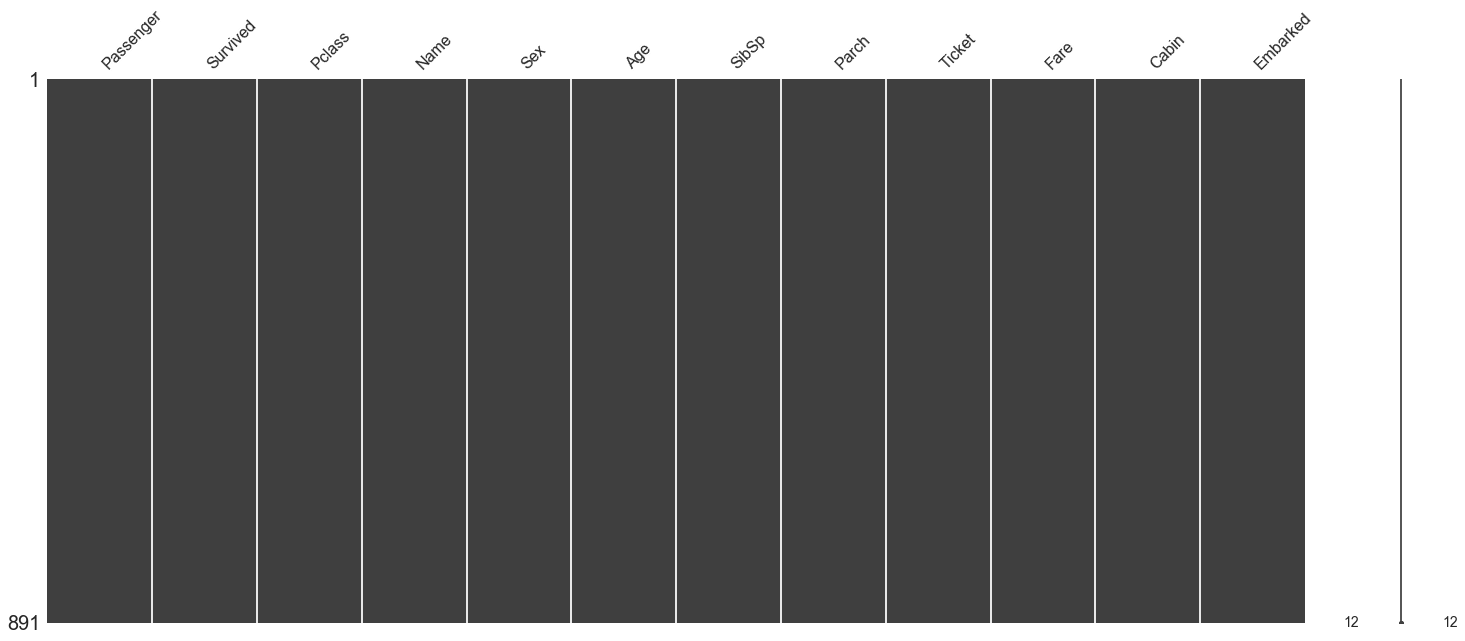

In [32]:
#missingno provides a small toolset of flexible and easy-to-use missing data visualizations
import missingno as msno
msno.matrix(st) # This cleary shows there is no missing values in the dataset.

In [33]:
# Lets understand basis Statistical significance
st.describe()

,Passenger,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,23.810325,0.523008,0.381594,32.263749
std,257.353842,0.486592,0.836071,17.601613,1.102743,0.806057,49.686919
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,6.000000,0.000000,0.000000,8.000000
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.000000


Text(0.5, 1.0, 'Fare Distribtion')

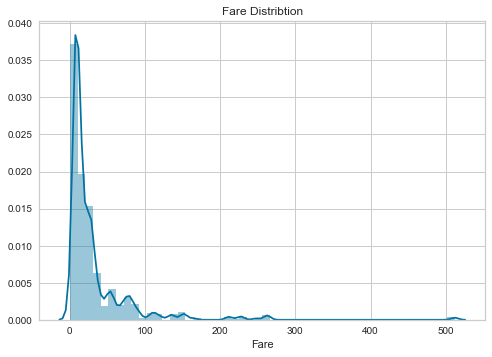

In [34]:
sns.distplot(st['Fare']);
plt.title('Fare Distribtion')

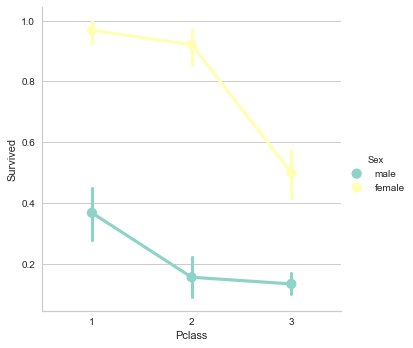

In [35]:
sns.catplot('Pclass','Survived',hue='Sex', kind = 'point', data=st, palette="Set3");

In [36]:
# Lets count Passangers in each Pclass
first_class_count= (st['Pclass'] == 1).sum()
second_class_count= (st['Pclass'] == 2).sum()
third_class_count= (st['Pclass'] == 3).sum()
print(" Number of Passangers in First Class: ", first_class_count)
print(" Number of Passangers in Second Class: ",second_class_count)
print(" Number of Passangers in Third Class: ", third_class_count)

 Number of Passangers in First Class:  216
 Number of Passangers in Second Class:  184
 Number of Passangers in Third Class:  491


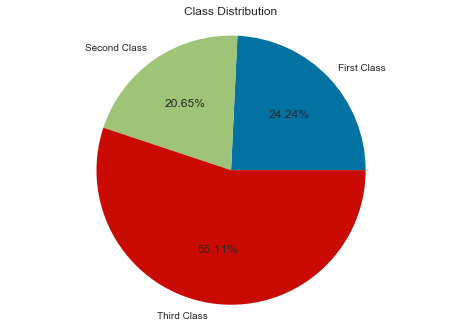

In [37]:
# Lets plot the distribution of the classes (Pclass).
labels=['First Class', 'Second Class', 'Third Class']
sizes=[first_class_count, second_class_count, third_class_count]
plt.pie(sizes, labels=labels, autopct= '%1.2f%%')
plt.axis('equal')
plt.title('Class Distribution')
plt.show()

# Highest count found in class 3. 

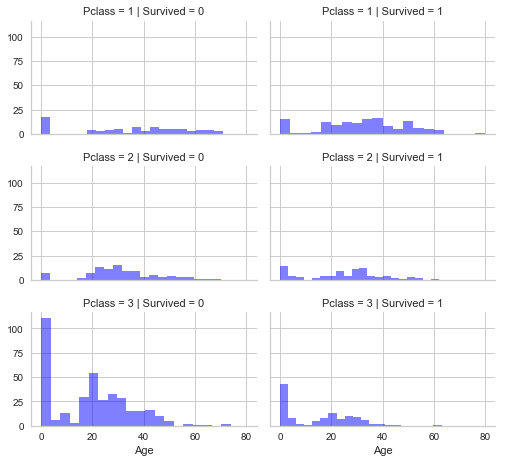

In [38]:
# Age based survival in each class of Pclass
fg = sns.FacetGrid(st, col='Survived', row='Pclass', size=2.2, aspect=1.6)
fg.map(plt.hist, 'Age', alpha=.5, bins=20, color='blue')
fg.add_legend()